In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dataset = pd.read_csv("dataset_20200712.csv", sep=',')

In [4]:
condicao = [dataset.UF_RESIDENCIA == 'AL', dataset.UF_RESIDENCIA == 'AP', dataset.UF_RESIDENCIA == 'AM', dataset.UF_RESIDENCIA == 'BA', dataset.UF_RESIDENCIA == 'CE', dataset.UF_RESIDENCIA == 'DF', dataset.UF_RESIDENCIA =='ES', dataset.UF_RESIDENCIA =='GO', dataset.UF_RESIDENCIA =='MA', dataset.UF_RESIDENCIA =='MT', dataset.UF_RESIDENCIA =='MS', dataset.UF_RESIDENCIA =='MG', dataset.UF_RESIDENCIA =='PA', dataset.UF_RESIDENCIA =='PB', dataset.UF_RESIDENCIA =='PR', dataset.UF_RESIDENCIA =='PE', dataset.UF_RESIDENCIA =='PI', dataset.UF_RESIDENCIA =='RJ', dataset.UF_RESIDENCIA =='RN', dataset.UF_RESIDENCIA =='RS', dataset.UF_RESIDENCIA =='RO', dataset.UF_RESIDENCIA =='RR', dataset.UF_RESIDENCIA =='SC', dataset.UF_RESIDENCIA =='SP', dataset.UF_RESIDENCIA =='SE', dataset.UF_RESIDENCIA =='TO']
resultado = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

dataset['UF_RESIDENCIA'] = np.select(condicao, resultado, 0)

dataset.dropna(axis=0, inplace=True)


In [5]:
dataset

,UF_RESIDENCIA,FAIXA_ETARIA,ESTADO_CIVIL,COR_RACA,IDIOMA,ESCOLARIDADE_DOS_PAIS,FAIXA_RENDA_PERCAPTA,TEM_INTERNET,ENSINO_PUBLICO,RENDIMENTO_GERAL
0,16,6.0,1,1,0,0,1,1,0,EXCELENTE
1,4,7.0,0,1,0,1,2,1,0,REGULAR
2,7,2.0,1,1,1,0,0,1,0,REGULAR
3,16,2.0,1,1,1,1,0,1,0,REGULAR
4,24,6.0,1,0,0,2,3,1,2,REGULAR
...,...,...,...,...,...,...,...,...,...,...
3157269,15,3.0,1,1,0,2,4,1,1,REGULAR
3157270,5,7.0,0,1,0,1,1,1,0,REGULAR
3157271,25,7.0,1,0,0,2,7,1,2,REGULAR
3157272,16,5.0,1,1,0,0,0,0,0,REGULAR


In [6]:
dataset.RENDIMENTO_GERAL.value_counts()

REGULAR         2358534
INSUFICIENTE     505500
EXCELENTE        293197
Name: RENDIMENTO_GERAL, dtype: int64

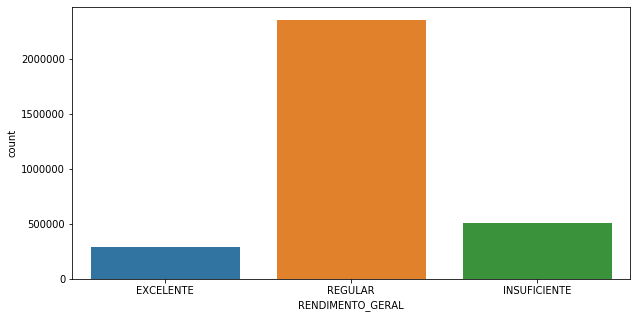

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='RENDIMENTO_GERAL', data=dataset)

In [9]:
############### Árvore de Decisão

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_tree = dataset.drop(columns=['RENDIMENTO_GERAL'])
y_tree = dataset.RENDIMENTO_GERAL

In [12]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier()

In [15]:
tree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
predicao_tree = tree.predict(X_test_tree)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test_tree, predicao_tree))

              precision    recall  f1-score   support

   EXCELENTE       0.55      0.32      0.41     87986
INSUFICIENTE       0.25      0.01      0.03    151436
     REGULAR       0.77      0.96      0.85    707748

    accuracy                           0.75    947170
   macro avg       0.52      0.43      0.43    947170
weighted avg       0.66      0.75      0.68    947170



In [19]:
print(confusion_matrix(y_test_tree, predicao_tree))

[[ 28271    260  59455]
 [   586   2122 148728]
 [ 22162   6035 679551]]


In [20]:
################# Redes Bayseanas ###############

In [21]:
X_Bayes = dataset.drop(columns=['RENDIMENTO_GERAL'])
y_Bayes = dataset.RENDIMENTO_GERAL

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
modelGNB = GaussianNB()

In [24]:
X_train_Bayes, X_test_Bayes, y_train_Bayes, y_test_Bayes = train_test_split(X_Bayes, y_Bayes, test_size=0.3)

In [25]:
modelGNB.fit(X_train_Bayes, y_train_Bayes)

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
predicao_Bayes = modelGNB.predict(X_test_Bayes)

In [27]:
print(classification_report(y_test_Bayes, predicao_Bayes))

              precision    recall  f1-score   support

   EXCELENTE       0.34      0.69      0.46     87662
INSUFICIENTE       0.30      0.45      0.36    151554
     REGULAR       0.81      0.62      0.70    707954

    accuracy                           0.60    947170
   macro avg       0.48      0.58      0.51    947170
weighted avg       0.68      0.60      0.62    947170



In [28]:
print(confusion_matrix(y_test_Bayes, predicao_Bayes))

[[ 60055   1676  25931]
 [  4411  67728  79415]
 [109721 158180 440053]]


In [29]:
########## Regressão Logística #########

In [30]:
X = dataset.drop(columns='RENDIMENTO_GERAL')
y = dataset.RENDIMENTO_GERAL

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmdel = LogisticRegression()

In [34]:
logmdel.fit(X_train, y_train)

C:\Users\Vinicius\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predicao = logmdel.predict(X_test)

In [36]:
print(classification_report(y_test, predicao)) 

C:\Users\Vinicius\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   EXCELENTE       0.58      0.29      0.39     87634
INSUFICIENTE       0.00      0.00      0.00    151824
     REGULAR       0.76      0.97      0.86    707712

    accuracy                           0.76    947170
   macro avg       0.45      0.42      0.41    947170
weighted avg       0.62      0.76      0.68    947170



In [37]:
print(confusion_matrix(y_test, predicao))

[[ 25328      0  62306]
 [   224      0 151600]
 [ 17820      0 689892]]


In [38]:
########### Floresta Aleatória

In [39]:
X_florest = dataset.drop(columns='RENDIMENTO_GERAL')
y_florest = dataset.RENDIMENTO_GERAL

In [40]:
X_train_florest, X_test_florest, y_train_florest, y_test_florest = train_test_split(X_florest, y_florest, test_size=0.3)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=100)

In [43]:
rfc.fit(X_train_florest, y_train_florest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
predicao = rfc.predict(X_test_florest)

In [45]:
print(classification_report(y_test_florest, predicao)) 

              precision    recall  f1-score   support

   EXCELENTE       0.57      0.31      0.40     87985
INSUFICIENTE       0.28      0.01      0.02    151733
     REGULAR       0.76      0.97      0.85    707452

    accuracy                           0.75    947170
   macro avg       0.54      0.43      0.43    947170
weighted avg       0.67      0.75      0.68    947170



In [46]:
print(confusion_matrix(y_test_florest, predicao))

[[ 27362    131  60492]
 [   427   1532 149774]
 [ 20002   3747 683703]]


In [47]:
############ KNN

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(dataset.drop('RENDIMENTO_GERAL', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
dataset_Normalizado = scaler.transform(dataset.drop('RENDIMENTO_GERAL', axis=1))

In [52]:
dataset_Normalizado

array([[ 0.26747779,  0.798765  ,  0.30873175, ..., -0.51445041,
         0.5788377 , -0.52849847],
       [-1.41049001,  1.32119803, -3.23905785, ...,  0.06144074,
         0.5788377 , -0.52849847],
       [-0.99099806, -1.29096714,  0.30873175, ..., -1.09034155,
         0.5788377 , -0.52849847],
       ...,
       [ 1.52595364,  1.32119803,  0.30873175, ...,  2.94089646,
         0.5788377 ,  2.1508081 ],
       [ 0.26747779,  0.27633196,  0.30873175, ..., -1.09034155,
        -1.72759997, -0.52849847],
       [-0.85116741, -0.24610107,  0.30873175, ..., -0.51445041,
         0.5788377 , -0.52849847]])

In [53]:
dataset_Padrao = pd.DataFrame(dataset_Normalizado, columns=dataset.columns[:-1])

In [54]:
dataset_Padrao

,UF_RESIDENCIA,FAIXA_ETARIA,ESTADO_CIVIL,COR_RACA,IDIOMA,ESCOLARIDADE_DOS_PAIS,FAIXA_RENDA_PERCAPTA,TEM_INTERNET,ENSINO_PUBLICO
0,0.267478,0.798765,0.308732,0.76290,-1.062713,-1.026232,-0.514450,0.578838,-0.528498
1,-1.410490,1.321198,-3.239058,0.76290,-1.062713,0.271295,0.061441,0.578838,-0.528498
2,-0.990998,-1.290967,0.308732,0.76290,0.940988,-1.026232,-1.090342,0.578838,-0.528498
3,0.267478,-1.290967,0.308732,0.76290,0.940988,0.271295,-1.090342,0.578838,-0.528498
4,1.386123,0.798765,0.308732,-1.24913,-1.062713,1.568822,0.637332,0.578838,2.150808
...,...,...,...,...,...,...,...,...,...
3157226,0.127647,-0.768534,0.308732,0.76290,-1.062713,1.568822,1.213223,0.578838,0.811155
3157227,-1.270659,1.321198,-3.239058,0.76290,-1.062713,0.271295,-0.514450,0.578838,-0.528498
3157228,1.525954,1.321198,0.308732,-1.24913,-1.062713,1.568822,2.940896,0.578838,2.150808
3157229,0.267478,0.276332,0.308732,0.76290,-1.062713,-1.026232,-1.090342,-1.727600,-0.528498


In [55]:
X_KNN = dataset_Padrao
y_KNN = dataset.RENDIMENTO_GERAL

In [56]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_KNN, y_KNN, test_size=0.3)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
KNN = KNeighborsClassifier(n_neighbors=25)

In [59]:
KNN.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [60]:
predicao_KNN = KNN.predict(X_test_KNN)

In [61]:
print(classification_report(y_test_KNN, predicao_KNN)) 

              precision    recall  f1-score   support

   EXCELENTE       0.57      0.31      0.40     87759
INSUFICIENTE       0.37      0.03      0.06    151026
     REGULAR       0.77      0.96      0.85    708385

    accuracy                           0.75    947170
   macro avg       0.57      0.43      0.44    947170
weighted avg       0.69      0.75      0.68    947170



In [62]:
print(confusion_matrix(y_test_KNN, predicao_KNN))

[[ 27133     51  60575]
 [   307   4648 146071]
 [ 19954   7789 680642]]
